In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm #A library that provides a fast, extensible progress bar for loops and other iterable computations
import gc #The garbage collection module for automatic memory management.
import sys #A module that provides access to some variables used or maintained by the Python interpreter and functions that interact strongly 
# with the interpreter.
import warnings # A module that provides a simple interface for filtering and handling warning messages.
warnings.filterwarnings("ignore") #suppressing warning messages

In [5]:
# Loading the data into the dataframe
date = pd.read_csv('train_date.csv', nrows = 10000)
numeric = pd.read_csv('train_numeric.csv', nrows = 10000)
category = pd.read_csv('train_categorical.csv', nrows = 10000)

In [6]:
date

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,...,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
0,4,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,19915,904.17,904.17,904.17,904.17,904.17,904.17,904.17,904.17,904.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,19917,640.60,640.60,640.60,640.60,640.60,640.60,640.60,640.60,640.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,19921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
numeric

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9996,19915,-0.147,-0.168,-0.033,-0.016,0.074,0.161,0.030,0.128,0.056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9997,19917,-0.095,0.004,0.330,0.312,-0.143,-0.339,0.037,0.128,0.061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9998,19921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [8]:
category

,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,19915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,19917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,19921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
category

,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,19915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,19917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,19921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# From the datasets , the workstations number is from S0 to S51 , so total number of workstations = 52
# The lines are from L0 to L3 , so total lines = 4

# The number of featues are (including Id) is 4264 (F0 to F4262)
# Date dataset stores the Dn timestamp (Ln_Sn_Dn) of a feature of a Fn-1 (Ln_Sn_Fn-1)

# By loading the dat of each dataset, it is possible to check all the column names at the same time and there is any pattern in them

# The data was separated by column from a single table, therefore, the original table can be restored by simply binding all the three tables together 
# without any advanced joining procedure

# the last digit of each column is just the column number, instead of the feature ID. Each timestamp column is located next to corresponding F column, 
# which explains why D(n) columns are describing F(n - 1) columns.

# So the original datframe might be in the form of

# Id  L0_S0_F0  L0_S0_D1  L0_S0_F2  L0_S0_D3  L0_S0_F4  ......   ....      Response
# .................................................................................
# .................................................................................

# This huge dataset is divided into three datsets and given as date, numeric, categorical

In [11]:
null_date = date.isnull().sum()

In [12]:
print(null_date)

Id                 0
L0_S0_D1        4267
L0_S0_D3        4267
L0_S0_D5        4267
L0_S0_D7        4267
                ... 
L3_S51_D4255    9499
L3_S51_D4257    9499
L3_S51_D4259    9499
L3_S51_D4261    9499
L3_S51_D4263    9499
Length: 1157, dtype: int64


In [13]:
numeric.isnull().sum()

Id                 0
L0_S0_F0        4267
L0_S0_F2        4267
L0_S0_F4        4267
L0_S0_F6        4267
                ... 
L3_S51_F4256    9499
L3_S51_F4258    9499
L3_S51_F4260    9499
L3_S51_F4262    9499
Response           0
Length: 970, dtype: int64

In [14]:
category.isnull().sum()

Id                  0
L0_S1_F25        9999
L0_S1_F27        9999
L0_S1_F29        9999
L0_S1_F31        9999
                ...  
L3_S49_F4234    10000
L3_S49_F4235    10000
L3_S49_F4237    10000
L3_S49_F4239    10000
L3_S49_F4240    10000
Length: 2141, dtype: int64

In [15]:
# there is a massive missingness within the dataset
# each observation only goes through a certain number of stations, and will not be touched by most of other stations
# Category has most mising data many features only have a single unique value 
# So few columns with data will be selected from here

# In date colun same Id, station pairs have same value
print(date.shape)
print(1.0 * date.count().sum()/date.size ) 
# This prints fraction of the non null values inside the date dataframe
print(date[:2])

(10000, 1157)
0.17792057044079515
   Id  L0_S0_D1  L0_S0_D3  L0_S0_D5  L0_S0_D7  L0_S0_D9  L0_S0_D11  L0_S0_D13  \
0   4     82.24     82.24     82.24     82.24     82.24      82.24      82.24   
1   6       NaN       NaN       NaN       NaN       NaN        NaN        NaN   

   L0_S0_D15  L0_S0_D17  ...  L3_S50_D4246  L3_S50_D4248  L3_S50_D4250  \
0      82.24      82.24  ...           NaN           NaN           NaN   
1        NaN        NaN  ...           NaN           NaN           NaN   

   L3_S50_D4252  L3_S50_D4254  L3_S51_D4255  L3_S51_D4257  L3_S51_D4259  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   

   L3_S51_D4261  L3_S51_D4263  
0           NaN           NaN  
1           NaN           NaN  

[2 rows x 1157 columns]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

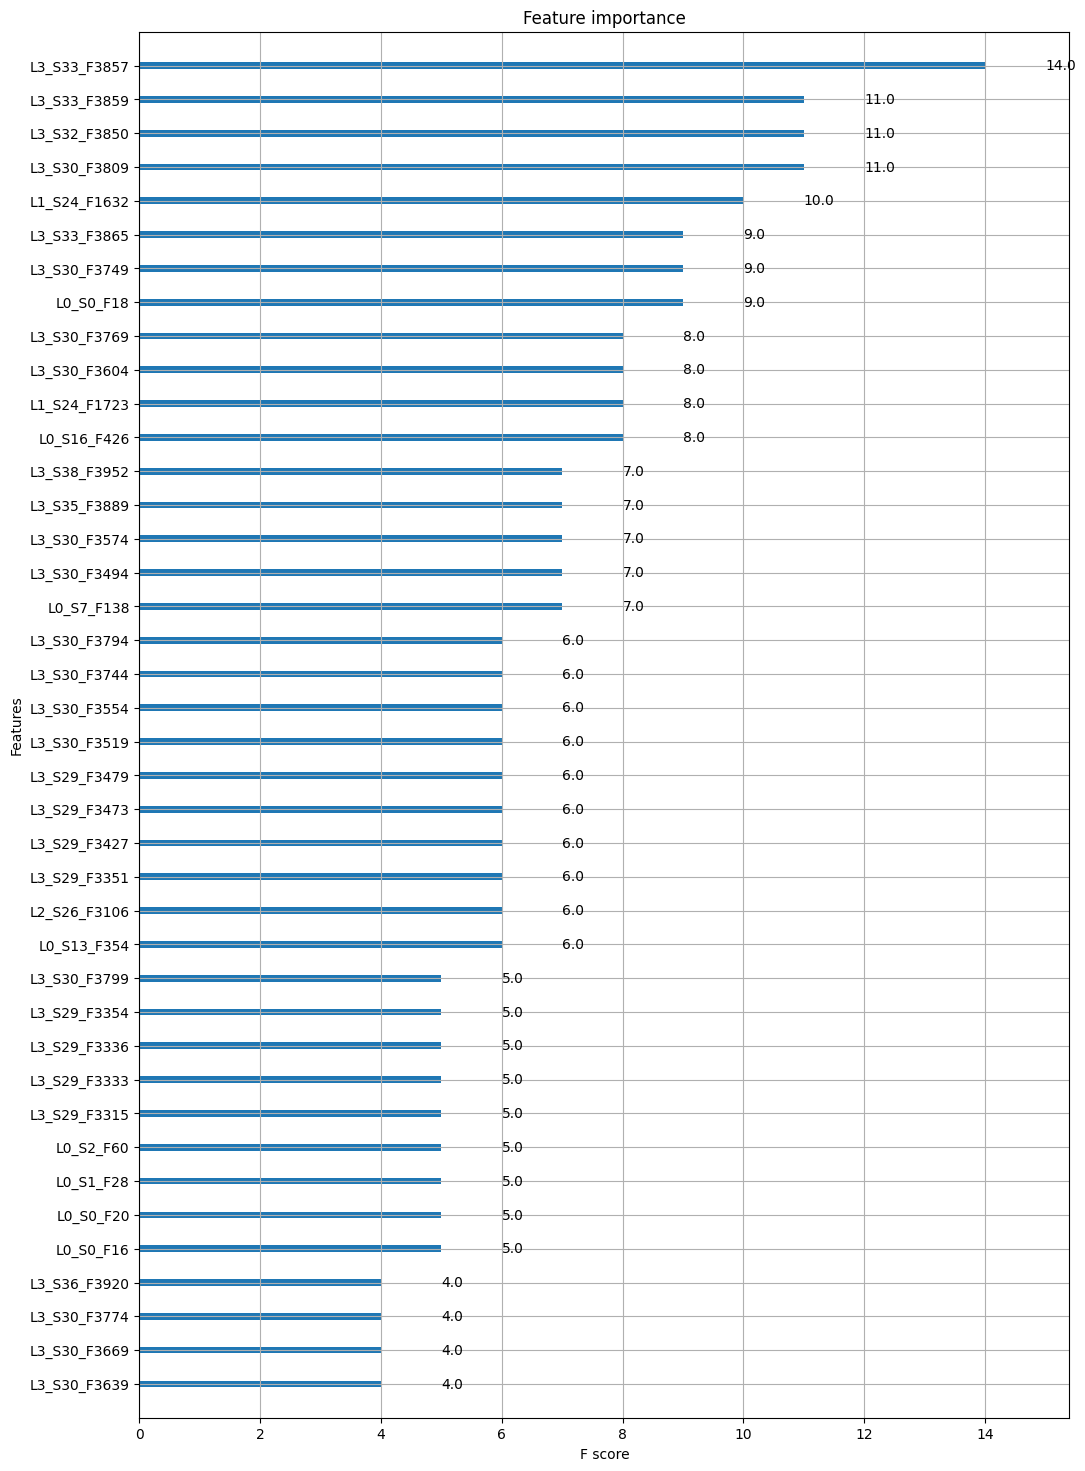

In [16]:
import numpy as np #  for numerical operations
import pandas as pd # data manipulation
import seaborn as sns # for statistical data visualization
import matplotlib.pyplot as plt # for creating plots

chunks = pd.read_csv("train_numeric.csv",chunksize=50000)
# The chunksize is set to 50,000. This means that each chunk generated by the iterator chunks will contain 50,000 rows from the "train_numeric.csv" file
# When dealing with large datasets, loading the entire dataset into memory may not be practical. In such cases, the dataset can be read in chunks 
# using functions like pd.read_csv in Pandas

import xgboost as xgb
model = xgb.XGBClassifier(n_estimators=30)
# Gradient boosting is an ensemble learning technique where multiple weak learners (typically decision trees) are combined 
# to create a strong predictive model.
# n_estimators specifies the number of boosting rounds or trees to be built

ctr=0
for chunk in chunks:
    model.fit(chunk.drop(['Id','Response'],axis=1),chunk['Response'])
    ctr+=1
    print(ctr)
# iterates over chunks of a dataset and trains an XGBoost classifier mode on each chunk

fig, ax = plt.subplots(figsize=(12,18))
# It returns a tuple containing a figure (fig) and an array of axes (ax). In this case, it's a single subplot.

xgb.plot_importance(model,ax =ax,max_num_features=40)
# generates a bar plot of feature importance based on a trained XGBoost model

In [17]:
np.set_printoptions(suppress = True)
# small floating-point values will be displayed in a way that avoids the use of scientific notation, making the output more human-readable.

imp = model.feature_importances_
# contains the importance scores of each feature

name =model.get_booster().feature_names
# obtain the names of the features used in the XGBoost model

pd.DataFrame({'feat':name,'impo':imp}).sort_values(by='impo',ascending=False)['feat'].head(40).values
# creates a Pandas DataFrame with columns 'feat' and 'impo' representing feature names and their importance scores, respectively.
# DataFrame is then sorted in descending order based on feature importance, and only the top 40 features are selected

array(['L0_S12_F350', 'L3_S33_F3855', 'L1_S24_F1632', 'L0_S0_F0',
       'L3_S29_F3324', 'L3_S32_F3850', 'L0_S9_F200', 'L3_S29_F3464',
       'L1_S24_F1723', 'L3_S30_F3709', 'L0_S4_F104', 'L1_S24_F1695',
       'L1_S24_F1122', 'L2_S26_F3117', 'L0_S2_F64', 'L0_S4_F109',
       'L0_S11_F318', 'L0_S21_F477', 'L3_S29_F3327', 'L3_S29_F3345',
       'L2_S27_F3155', 'L3_S30_F3829', 'L3_S33_F3857', 'L0_S0_F18',
       'L0_S6_F132', 'L0_S10_F274', 'L3_S29_F3382', 'L0_S9_F180',
       'L0_S16_F426', 'L3_S30_F3629', 'L3_S30_F3564', 'L3_S33_F3859',
       'L0_S11_F302', 'L2_S26_F3073', 'L0_S3_F80', 'L2_S26_F3062',
       'L0_S15_F397', 'L0_S15_F418', 'L3_S30_F3804', 'L1_S24_F902'],
      dtype=object)

In [18]:
num_feats = ['Id', 
             'L0_S12_F350', 'L3_S33_F3855', 'L1_S24_F1632', 'L0_S0_F0',
       'L3_S29_F3324', 'L3_S32_F3850', 'L0_S9_F200', 'L3_S29_F3464',
       'L1_S24_F1723', 'L3_S30_F3709', 'L0_S4_F104', 'L1_S24_F1695',
       'L1_S24_F1122', 'L2_S26_F3117', 'L0_S2_F64', 'L0_S4_F109',
       'L0_S11_F318', 'L0_S21_F477', 'L3_S29_F3327', 'L3_S29_F3345',
       'L2_S27_F3155', 'L3_S30_F3829', 'L3_S33_F3857', 'L0_S0_F18',
       'L0_S6_F132', 'L0_S10_F274', 'L3_S29_F3382', 'L0_S9_F180',
       'L0_S16_F426', 'L3_S30_F3629', 'L3_S30_F3564', 'L3_S33_F3859',
       'L0_S11_F302', 'L2_S26_F3073', 'L0_S3_F80', 'L2_S26_F3062',
       'L0_S15_F397', 'L0_S15_F418', 'L3_S30_F3804', 'L1_S24_F902',
             'Response']

In [19]:
length = date.drop('Id', axis=1).count()
# Number of non null values along the columns (axis = 1)
length
# This is a Panda series where index are date features and their value has their counts

L0_S0_D1        5733
L0_S0_D3        5733
L0_S0_D5        5733
L0_S0_D7        5733
L0_S0_D9        5733
                ... 
L3_S51_D4255     501
L3_S51_D4257     501
L3_S51_D4259     501
L3_S51_D4261     501
L3_S51_D4263     501
Length: 1156, dtype: int64

In [20]:
date_cols = length.reset_index().sort_values(by=0, ascending=False)
# The series is transformed to a dataframe 
# Index becomes a regular column and the count gets a column name '0' (reset_index)
# dataframe is sorted based on values in the column '0' in descending order
date_cols

,index,0
1054,L3_S37_D3949,9473
1053,L3_S37_D3947,9473
1052,L3_S37_D3945,9473
1051,L3_S37_D3943,9473
1050,L3_S37_D3942,9473
...,...,...
1091,L3_S42_D4037,0
1090,L3_S42_D4033,0
1089,L3_S42_D4029,0
302,L1_S24_D1158,0


In [21]:
stations = sorted(date_cols['index'].str.split('_',expand=True)[1].unique().tolist())
# The station names in the dataframe are taken out and stored in the list
stations

['S0',
 'S1',
 'S10',
 'S11',
 'S12',
 'S13',
 'S14',
 'S15',
 'S16',
 'S17',
 'S18',
 'S19',
 'S2',
 'S20',
 'S21',
 'S22',
 'S23',
 'S24',
 'S25',
 'S26',
 'S27',
 'S28',
 'S29',
 'S3',
 'S30',
 'S31',
 'S32',
 'S33',
 'S34',
 'S35',
 'S36',
 'S37',
 'S38',
 'S39',
 'S4',
 'S40',
 'S41',
 'S42',
 'S43',
 'S44',
 'S45',
 'S46',
 'S47',
 'S48',
 'S49',
 'S5',
 'S50',
 'S51',
 'S6',
 'S7',
 'S8',
 'S9']

In [22]:
date_cols['station'] = date_cols['index'].str.split('_',expand=True)[1]
# A new column station in which corresponding station names of the date features are stored
date_cols

,index,0,station
1054,L3_S37_D3949,9473,S37
1053,L3_S37_D3947,9473,S37
1052,L3_S37_D3945,9473,S37
1051,L3_S37_D3943,9473,S37
1050,L3_S37_D3942,9473,S37
...,...,...,...
1091,L3_S42_D4037,0,S42
1090,L3_S42_D4033,0,S42
1089,L3_S42_D4029,0,S42
302,L1_S24_D1158,0,S24


In [23]:
date_cols = date_cols.drop_duplicates('station', keep='first')['index'].tolist()
# This part drops duplicate rows based on the 'station' column, keeping only the first occurrence for each unique station.
# Only Index column which has date feature names is kept
# Because as we saw by observation in the previous step same (station ,Id) pairs is having the same date feature value, 
# so one feature name for one station is kept 
date_cols

['L3_S37_D3949',
 'L3_S30_D3541',
 'L3_S29_D3428',
 'L3_S34_D3877',
 'L3_S33_D3870',
 'L0_S0_D3',
 'L0_S1_D30',
 'L0_S8_D145',
 'L3_S36_D3919',
 'L3_S35_D3910',
 'L0_S5_D115',
 'L0_S3_D70',
 'L0_S6_D120',
 'L0_S7_D143',
 'L0_S2_D54',
 'L0_S4_D106',
 'L0_S12_D333',
 'L0_S20_D465',
 'L0_S13_D355',
 'L0_S10_D266',
 'L0_S11_D284',
 'L0_S9_D192',
 'L2_S26_D3084',
 'L1_S24_D1828',
 'L0_S19_D457',
 'L0_S17_D432',
 'L0_S14_D380',
 'L0_S15_D401',
 'L0_S16_D428',
 'L2_S27_D3156',
 'L0_S18_D447',
 'L0_S21_D469',
 'L0_S23_D629',
 'L0_S22_D608',
 'L3_S41_D4021',
 'L3_S40_D3981',
 'L3_S45_D4129',
 'L3_S48_D4203',
 'L3_S47_D4155',
 'L3_S39_D3974',
 'L3_S51_D4255',
 'L1_S25_D1887',
 'L3_S31_D3848',
 'L3_S43_D4097',
 'L3_S49_D4208',
 'L3_S50_D4254',
 'L3_S44_D4122',
 'L3_S38_D3953',
 'L3_S32_D3852',
 'L2_S28_D3234',
 'L3_S46_D4135',
 'L3_S42_D4057']

In [24]:
print(len(date_cols))

52


In [25]:
date ['L0_S0_D3']

0         82.24
1           NaN
2       1618.70
3       1149.20
4        602.64
         ...   
9995        NaN
9996     904.17
9997     640.60
9998        NaN
9999    1379.75
Name: L0_S0_D3, Length: 10000, dtype: float64

In [26]:
# error in the assembly line increases with the number of steps required in order to produce a part.
# The more number of stations it passes through the more it is prone to error

data = None
# read the CSV file in chunks of 50,000 rows (chunksize=50000)
# using the columns Id and columns in date_cols from the dataset (53 cols in total)
for chunk in pd.read_csv('train_date.csv', usecols = ['Id'] + date_cols, chunksize=50000, low_memory=False):

    chunk.columns = ['Id'] + stations
    # It is a property of the DataFrame that holds the names of all columns.
    #this line of code is renaming the columns of the DataFrame chunk. The column names are replaced with a new set of names, where the first column
    #is labeled 'Id', and the subsequent columns are named after the stations
    
    chunk['start_station'] = -1
    chunk['end_station'] = -1
    # Two new columns, 'start_station' and 'end_station', are added to the chunk, and their initial values are set to -1.
    
    for s in stations:
        chunk[s] = 1 * (chunk[s] >= 0)
        
        # binarization of data
        # This line converts the values in the current station column of the DataFrame chunk to binary format. It sets the value to 1 if the original 
        # value is greater than or equal to 0, and 0 otherwise.
        
        id_not_null = chunk[chunk[s] == 1].Id
        # A new variable id_not_null is created, containing the 'Id' values where the newly created column for the current station has a value of 1
        
        chunk.loc[(chunk['start_station']== -1) & (chunk.Id.isin(id_not_null)),'start_station'] = int(s[1:])
        # This line updates the 'start_station' column in chunk based on certain conditions. 
        # It sets the 'start_station' to the integer value of the substring of the station names (excluding the first character) for rows
        # where 'start_station' is still -1, and the 'Id' is in the id_not_null list.
        
        chunk.loc[chunk.Id.isin(id_not_null),'end_station'] = int(s[1:])   
        # This line updates the 'end_station' column in chunk. 
        # It sets the 'end_station' to the integer value of the substring of the station names (excluding the first character) for all rows
        # where the 'Id' is in the id_not_null list.
    
    data = pd.concat([data, chunk])

In [27]:
for chunk in pd.read_csv('test_date.csv', usecols=['Id'] + date_cols, chunksize=50000, low_memory=False):
    # Rename columns to use station names
    chunk.columns = ['Id'] + stations
    
    # Add 'start_station' and 'end_station' columns initialized with -1
    chunk['start_station'] = -1
    chunk['end_station'] = -1
    
    # Iterate through station columns
    for s in stations:
        # Convert column values to binary (1 if >= 0, 0 otherwise)
        chunk[s] = 1 * (chunk[s] >= 0)
        
        # Get Ids where the column value is not null
        id_not_null = chunk[chunk[s] == 1].Id
        
        # Update 'start_station' and 'end_station' based on conditions
        chunk.loc[(chunk['start_station'] == -1) & (chunk.Id.isin(id_not_null)), 'start_station'] = int(s[1:])
        chunk.loc[chunk.Id.isin(id_not_null), 'end_station'] = int(s[1:])   
    
    # Concatenate the processed chunk to the main DataFrame 'data'
    data = pd.concat([data, chunk])

# Delete the chunk and perform garbage collection
del chunk
gc.collect()

3

In [28]:
data

,Id,S0,S1,S10,S11,S12,S13,S14,S15,S16,...,S49,S5,S50,S51,S6,S7,S8,S9,start_station,end_station
0,4,1,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,42
1,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,42
2,7,1,1,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,42
3,9,1,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,42
4,11,1,1,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183743,2367483,1,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,42
1183744,2367485,1,1,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,42
1183745,2367486,1,1,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,42
1183746,2367489,1,1,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,42


In [30]:
data = data[['Id', 'start_station', 'end_station']]
usefuldatefeatures = ['Id'] + date_cols

In [31]:
minmaxfeatures = None

for chunk in pd.read_csv('train_date.csv', usecols = usefuldatefeatures, chunksize=50000, low_memory = False):
    # Reading the data in the dataset in the form of chunks
    
    features = chunk.columns.values.tolist()
    features.remove('Id')
    
    df_mindate_chunk = chunk[['Id']].copy()
    
    df_mindate_chunk['mindate'] = chunk[features].min(axis=1).values
    # The axis=1 argument indicates that the minimum and the maximum should be calculated across columns for each row
    # Converts the resulting Pandas Series to a NumPy array. (.values)
    df_mindate_chunk['maxdate'] = chunk[features].max(axis=1).values
    
    df_mindate_chunk['min_time_station'] =  chunk[features].idxmin(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    # Finds the column label (feature name) with the minimum value for each row.
    # Applies a lambda function to extract the station number from the column label
    
    df_mindate_chunk['max_time_station'] =  chunk[features].idxmax(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    
    minmaxfeatures = pd.concat([minmaxfeatures, df_mindate_chunk])

del chunk
gc.collect()

770

In [32]:
minmaxfeatures

,Id,mindate,maxdate,min_time_station,max_time_station
0,4,82.24,87.29,0,35
1,6,1313.12,1315.75,12,33
2,7,1618.70,1624.42,0,33
3,9,1149.20,1154.16,0,36
4,11,602.64,606.02,0,36
...,...,...,...,...,...
1183742,2367490,1239.90,1244.04,0,33
1183743,2367491,624.22,626.66,12,36
1183744,2367492,1482.18,1490.61,0,34
1183745,2367493,608.83,610.75,0,33


In [33]:
for chunk in pd.read_csv('test_date.csv',usecols=usefuldatefeatures,chunksize=50000,low_memory=False):
    features = chunk.columns.values.tolist()
    features.remove('Id')
    df_mindate_chunk = chunk[['Id']].copy()
    df_mindate_chunk['mindate'] = chunk[features].min(axis=1).values
    df_mindate_chunk['maxdate'] = chunk[features].max(axis=1).values
    df_mindate_chunk['min_time_station'] =  chunk[features].idxmin(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    df_mindate_chunk['max_time_station'] =  chunk[features].idxmax(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    minmaxfeatures = pd.concat([minmaxfeatures, df_mindate_chunk])

del chunk
gc.collect()

0

In [34]:
minmaxfeatures

,Id,mindate,maxdate,min_time_station,max_time_station
0,4,82.24,87.29,0,35
1,6,1313.12,1315.75,12,33
2,7,1618.70,1624.42,0,33
3,9,1149.20,1154.16,0,36
4,11,602.64,606.02,0,36
...,...,...,...,...,...
1183743,2367483,653.85,655.45,0,35
1183744,2367485,907.34,911.29,0,34
1183745,2367486,185.92,186.32,0,35
1183746,2367489,570.85,572.67,0,35


In [35]:
minmaxfeatures.Id

0                4
1                6
2                7
3                9
4               11
            ...   
1183743    2367483
1183744    2367485
1183745    2367486
1183746    2367489
1183747    2367494
Name: Id, Length: 2367495, dtype: int64

In [36]:
minmaxfeatures.sort_values(by=['mindate', 'Id'], inplace=True)
# Sorting is first performed based on 'mindate', and for rows with the same 'mindate', further sorting is done based on 'Id'.
minmaxfeatures['min_Id_rev'] = -minmaxfeatures.Id.diff().shift(-1)
# Calculates the difference between consecutive values in the 'Id' column.
# Shifts the calculated differences down by one position.
# The negative sign - is applied to reverse the sign of the differences.

minmaxfeatures['min_Id'] = minmaxfeatures.Id.diff()
# calculates the differences between consecutive values in the 'Id' column and assigns the result to the 'min_Id' column.

In [37]:
minmaxfeatures

,Id,mindate,maxdate,min_time_station,max_time_station,min_Id_rev,min_Id
255472,510783,0.00,1.61,0,37,-140759.0,NaN
325556,651542,0.00,1.53,0,37,543349.0,140759.0
54038,108193,0.01,1.61,0,33,-322219.0,-543349.0
215108,430412,0.01,1.53,0,37,-13085.0,322219.0
221628,443497,0.01,1.53,0,36,-69868.0,13085.0
...,...,...,...,...,...,...,...
1161319,2322627,NaN,NaN,-1,-1,-805.0,2983.0
1161719,2323432,NaN,NaN,-1,-1,-1297.0,805.0
1162370,2324729,NaN,NaN,-1,-1,-6721.0,1297.0
1165718,2331450,NaN,NaN,-1,-1,-21898.0,6721.0


In [38]:
cols = [['Id'] + date_cols, num_feats]

In [39]:
cols

[['Id',
  'L3_S37_D3949',
  'L3_S30_D3541',
  'L3_S29_D3428',
  'L3_S34_D3877',
  'L3_S33_D3870',
  'L0_S0_D3',
  'L0_S1_D30',
  'L0_S8_D145',
  'L3_S36_D3919',
  'L3_S35_D3910',
  'L0_S5_D115',
  'L0_S3_D70',
  'L0_S6_D120',
  'L0_S7_D143',
  'L0_S2_D54',
  'L0_S4_D106',
  'L0_S12_D333',
  'L0_S20_D465',
  'L0_S13_D355',
  'L0_S10_D266',
  'L0_S11_D284',
  'L0_S9_D192',
  'L2_S26_D3084',
  'L1_S24_D1828',
  'L0_S19_D457',
  'L0_S17_D432',
  'L0_S14_D380',
  'L0_S15_D401',
  'L0_S16_D428',
  'L2_S27_D3156',
  'L0_S18_D447',
  'L0_S21_D469',
  'L0_S23_D629',
  'L0_S22_D608',
  'L3_S41_D4021',
  'L3_S40_D3981',
  'L3_S45_D4129',
  'L3_S48_D4203',
  'L3_S47_D4155',
  'L3_S39_D3974',
  'L3_S51_D4255',
  'L1_S25_D1887',
  'L3_S31_D3848',
  'L3_S43_D4097',
  'L3_S49_D4208',
  'L3_S50_D4254',
  'L3_S44_D4122',
  'L3_S38_D3953',
  'L3_S32_D3852',
  'L2_S28_D3234',
  'L3_S46_D4135',
  'L3_S42_D4057'],
 ['Id',
  'L0_S12_F350',
  'L3_S33_F3855',
  'L1_S24_F1632',
  'L0_S0_F0',
  'L3_S29_F3324',
 

In [40]:
traindata = None
testdata = None


In [41]:
trainfiles = ['train_date.csv', 'train_numeric.csv']
testfiles = ['test_date.csv', 'test_numeric.csv']

In [42]:
for i,f in enumerate(trainfiles):
# enumerate is used to get both the index (i) and the value (f) from each element in trainfiles.
# This loop iterates over the elements of trainfiles, assigning each file name to the variable f, and its index to the variable i
# i -> index of the elements in the trainfiles
    
    subset = None
    
    for chunk in pd.read_csv(f,usecols=cols[i],chunksize=100000,low_memory=False):
        subset = pd.concat([subset, chunk])
    
    if traindata is None:
        traindata = subset.copy()
    else:
        traindata = pd.merge(traindata, subset.copy(), on="Id")
        
del subset,chunk
gc.collect()
del cols[1][-1]
# deleting the response from the cols list so that in testdata it wont be there

In [43]:
cols

[['Id',
  'L3_S37_D3949',
  'L3_S30_D3541',
  'L3_S29_D3428',
  'L3_S34_D3877',
  'L3_S33_D3870',
  'L0_S0_D3',
  'L0_S1_D30',
  'L0_S8_D145',
  'L3_S36_D3919',
  'L3_S35_D3910',
  'L0_S5_D115',
  'L0_S3_D70',
  'L0_S6_D120',
  'L0_S7_D143',
  'L0_S2_D54',
  'L0_S4_D106',
  'L0_S12_D333',
  'L0_S20_D465',
  'L0_S13_D355',
  'L0_S10_D266',
  'L0_S11_D284',
  'L0_S9_D192',
  'L2_S26_D3084',
  'L1_S24_D1828',
  'L0_S19_D457',
  'L0_S17_D432',
  'L0_S14_D380',
  'L0_S15_D401',
  'L0_S16_D428',
  'L2_S27_D3156',
  'L0_S18_D447',
  'L0_S21_D469',
  'L0_S23_D629',
  'L0_S22_D608',
  'L3_S41_D4021',
  'L3_S40_D3981',
  'L3_S45_D4129',
  'L3_S48_D4203',
  'L3_S47_D4155',
  'L3_S39_D3974',
  'L3_S51_D4255',
  'L1_S25_D1887',
  'L3_S31_D3848',
  'L3_S43_D4097',
  'L3_S49_D4208',
  'L3_S50_D4254',
  'L3_S44_D4122',
  'L3_S38_D3953',
  'L3_S32_D3852',
  'L2_S28_D3234',
  'L3_S46_D4135',
  'L3_S42_D4057'],
 ['Id',
  'L0_S12_F350',
  'L3_S33_F3855',
  'L1_S24_F1632',
  'L0_S0_F0',
  'L3_S29_F3324',
 

In [44]:
# similarly testdata is stored with date and numeric datasets excluding the Response column
for i, f in enumerate(testfiles):
    subset = None
    
    for chunk in pd.read_csv(f, usecols=cols[i],chunksize=100000,low_memory=False):
        
        # while reading the date dataset it uses the selected features of date
        # similarly for numeric dataset also 
        
        subset = pd.concat([subset, chunk])
        
    if testdata is None:
        testdata = subset.copy()
    else:
        testdata = pd.merge(testdata, subset.copy(), on="Id")
    
del subset,chunk
gc.collect()

0

In [45]:
# adding newly created features to the testdata and traindata
# minmaxfeatures -> has [Id	mindate	maxdate	min_time_station	max_time_station	min_Id_rev	min_Id]
# data -> has ['Id', 'start_station', 'end_station']
traindata = traindata.merge(minmaxfeatures, on='Id')
traindata = traindata.merge(data, on='Id')

testdata = testdata.merge(minmaxfeatures, on='Id')
testdata = testdata.merge(data, on='Id')

In [46]:
traindata

,Id,L0_S0_D3,L0_S1_D30,L0_S2_D54,L0_S3_D70,L0_S4_D106,L0_S5_D115,L0_S6_D120,L0_S7_D143,L0_S8_D145,...,L3_S33_F3859,Response,mindate,maxdate,min_time_station,max_time_station,min_Id_rev,min_Id,start_station,end_station
0,4,82.24,82.24,82.24,NaN,82.26,NaN,NaN,82.26,82.27,...,-0.048,0,82.24,87.29,0,35,-224451.0,-2314450.0,0,42
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.210,0,1313.12,1315.75,12,33,-67530.0,-2284042.0,2,42
2,7,1618.70,1618.70,1618.70,NaN,NaN,1618.72,1618.72,NaN,1618.73,...,0.236,0,1618.70,1624.42,0,33,-26876.0,-2313512.0,0,42
3,9,1149.20,1149.20,1149.21,NaN,1149.22,NaN,NaN,1149.22,1149.22,...,0.165,0,1149.20,1154.16,0,36,-3564.0,-2196581.0,0,42
4,11,602.64,602.64,NaN,602.64,602.66,NaN,NaN,602.67,602.67,...,0.147,0,602.64,606.02,0,36,-1.0,-2226678.0,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183742,2367490,1239.90,1239.90,1239.91,NaN,1239.93,NaN,1239.93,NaN,1239.94,...,0.152,0,1239.90,1244.04,0,33,2365689.0,925004.0,0,42
1183743,2367491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.139,0,624.22,626.66,12,36,1572356.0,71839.0,2,42
1183744,2367492,1482.18,1482.18,NaN,1482.19,NaN,1482.20,1482.21,NaN,1482.21,...,-0.114,0,1482.18,1490.61,0,34,2358793.0,53955.0,0,42
1183745,2367493,608.83,608.83,NaN,608.83,608.85,NaN,NaN,608.85,608.85,...,0.031,0,608.83,610.75,0,33,2357190.0,8988.0,0,42


In [47]:
testdata

,Id,L0_S0_D3,L0_S1_D30,L0_S2_D54,L0_S3_D70,L0_S4_D106,L0_S5_D115,L0_S6_D120,L0_S7_D143,L0_S8_D145,...,L3_S33_F3857,L3_S33_F3859,mindate,maxdate,min_time_station,max_time_station,min_Id_rev,min_Id,start_station,end_station
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.225,0.027,792.77,800.70,24,34,-3232.0,-2326858.0,30,42
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.061,0.024,1045.96,1060.07,27,36,-62612.0,-2366837.0,33,42
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.092,0.167,671.95,711.08,24,34,-16069.0,-2315057.0,30,42
3,5,255.45,255.45,255.46,NaN,255.48,NaN,NaN,255.48,255.48,...,-0.018,-0.073,255.45,256.28,0,36,-33948.0,-2364005.0,0,42
4,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.101,-0.108,743.40,770.28,24,33,-4312.0,-1898699.0,30,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183743,2367483,653.85,653.85,653.85,NaN,653.86,NaN,NaN,653.87,653.87,...,-0.062,0.102,653.85,655.45,0,35,2042322.0,7590.0,0,42
1183744,2367485,907.34,907.34,NaN,907.34,NaN,907.37,NaN,907.37,907.37,...,0.008,-0.139,907.34,911.29,0,34,2318983.0,3483.0,0,42
1183745,2367486,185.92,185.92,185.92,NaN,185.96,NaN,185.96,NaN,185.96,...,0.012,-0.014,185.92,186.32,0,35,2316034.0,4732.0,0,42
1183746,2367489,570.85,570.85,570.86,NaN,NaN,570.88,NaN,570.89,570.89,...,-0.152,0.033,570.85,572.67,0,35,2351203.0,10503.0,0,42


In [48]:
del minmaxfeatures,data
gc.collect()

0

In [49]:
# Too many Nan values so they are replaced by zero
# it also means for a specific part is not passed through any station or a specific feature(measurement or timestamp) may not be done 
traindata.fillna(value=0,inplace=True)
testdata.fillna(value=0,inplace=True)

In [50]:
testdata

,Id,L0_S0_D3,L0_S1_D30,L0_S2_D54,L0_S3_D70,L0_S4_D106,L0_S5_D115,L0_S6_D120,L0_S7_D143,L0_S8_D145,...,L3_S33_F3857,L3_S33_F3859,mindate,maxdate,min_time_station,max_time_station,min_Id_rev,min_Id,start_station,end_station
0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.225,0.027,792.77,800.70,24,34,-3232.0,-2326858.0,30,42
1,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.061,0.024,1045.96,1060.07,27,36,-62612.0,-2366837.0,33,42
2,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.092,0.167,671.95,711.08,24,34,-16069.0,-2315057.0,30,42
3,5,255.45,255.45,255.46,0.00,255.48,0.00,0.00,255.48,255.48,...,-0.018,-0.073,255.45,256.28,0,36,-33948.0,-2364005.0,0,42
4,8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.101,-0.108,743.40,770.28,24,33,-4312.0,-1898699.0,30,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183743,2367483,653.85,653.85,653.85,0.00,653.86,0.00,0.00,653.87,653.87,...,-0.062,0.102,653.85,655.45,0,35,2042322.0,7590.0,0,42
1183744,2367485,907.34,907.34,0.00,907.34,0.00,907.37,0.00,907.37,907.37,...,0.008,-0.139,907.34,911.29,0,34,2318983.0,3483.0,0,42
1183745,2367486,185.92,185.92,185.92,0.00,185.96,0.00,185.96,0.00,185.96,...,0.012,-0.014,185.92,186.32,0,35,2316034.0,4732.0,0,42
1183746,2367489,570.85,570.85,570.86,0.00,0.00,570.88,0.00,570.89,570.89,...,-0.152,0.033,570.85,572.67,0,35,2351203.0,10503.0,0,42


In [51]:
traindata

,Id,L0_S0_D3,L0_S1_D30,L0_S2_D54,L0_S3_D70,L0_S4_D106,L0_S5_D115,L0_S6_D120,L0_S7_D143,L0_S8_D145,...,L3_S33_F3859,Response,mindate,maxdate,min_time_station,max_time_station,min_Id_rev,min_Id,start_station,end_station
0,4,82.24,82.24,82.24,0.00,82.26,0.00,0.00,82.26,82.27,...,-0.048,0,82.24,87.29,0,35,-224451.0,-2314450.0,0,42
1,6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.210,0,1313.12,1315.75,12,33,-67530.0,-2284042.0,2,42
2,7,1618.70,1618.70,1618.70,0.00,0.00,1618.72,1618.72,0.00,1618.73,...,0.236,0,1618.70,1624.42,0,33,-26876.0,-2313512.0,0,42
3,9,1149.20,1149.20,1149.21,0.00,1149.22,0.00,0.00,1149.22,1149.22,...,0.165,0,1149.20,1154.16,0,36,-3564.0,-2196581.0,0,42
4,11,602.64,602.64,0.00,602.64,602.66,0.00,0.00,602.67,602.67,...,0.147,0,602.64,606.02,0,36,-1.0,-2226678.0,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183742,2367490,1239.90,1239.90,1239.91,0.00,1239.93,0.00,1239.93,0.00,1239.94,...,0.152,0,1239.90,1244.04,0,33,2365689.0,925004.0,0,42
1183743,2367491,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.139,0,624.22,626.66,12,36,1572356.0,71839.0,2,42
1183744,2367492,1482.18,1482.18,0.00,1482.19,0.00,1482.20,1482.21,0.00,1482.21,...,-0.114,0,1482.18,1490.61,0,34,2358793.0,53955.0,0,42
1183745,2367493,608.83,608.83,0.00,608.83,608.85,0.00,0.00,608.85,608.85,...,0.031,0,608.83,610.75,0,33,2357190.0,8988.0,0,42


In [52]:
# it suppresses the printing of small floating-point values in scientific notation and instead displays them in fixed-point notation.
np.set_printoptions(suppress=True)

In [53]:
total = traindata[traindata['Response']==0].sample(frac=1).head(400000)
# This part selects only those rows from the traindata DataFrame where the value in the 'Response' column is equal to 0. 
# The frac=1 means that the entire DataFrame is sampled, effectively shuffling all rows.
# selects the first 400,000 rows after shuffling.

In [54]:
total

,Id,L0_S0_D3,L0_S1_D30,L0_S2_D54,L0_S3_D70,L0_S4_D106,L0_S5_D115,L0_S6_D120,L0_S7_D143,L0_S8_D145,...,L3_S33_F3859,Response,mindate,maxdate,min_time_station,max_time_station,min_Id_rev,min_Id,start_station,end_station
300257,600693,638.91,638.91,0.00,638.92,638.94,0.00,0.00,638.97,638.97,...,0.140,0,638.91,651.66,0,35,-37902.0,1.0,0,42
515165,1030940,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.258,0,1295.64,1300.09,12,33,-2241.0,1667.0,2,42
261138,522510,1394.97,1394.97,0.00,1394.97,1394.99,0.00,0.00,1394.99,1394.99,...,0.072,0,1394.97,1395.46,0,37,-559.0,55700.0,0,42
1140554,2281161,22.06,22.06,22.07,0.00,0.00,22.08,22.09,0.00,22.09,...,0.081,0,22.06,34.63,0,37,-2114.0,4235.0,0,42
1002198,2004417,819.30,819.30,819.30,0.00,0.00,819.32,819.38,0.00,819.38,...,-0.160,0,819.30,822.12,0,35,-5569.0,5721.0,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871592,1743065,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.255,0,365.17,415.53,24,34,-215076.0,3989.0,30,42
892145,1784288,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.386,0,768.48,788.50,24,37,-1.0,13669.0,30,42
245320,490819,400.50,400.50,400.51,0.00,400.55,0.00,0.00,400.55,400.55,...,-0.073,0,400.50,402.35,0,36,-220001.0,10940.0,0,42
834092,1668206,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.053,0,620.81,624.52,12,36,-726.0,2578.0,2,42


In [63]:
total = pd.concat([total,traindata[traindata['Response']==1]]).sample(frac=1)
# This line concatenates the previously sampled rows (total) with rows from traindata where the 'Response' column is equal to 1 
# The frac=1 means that the entire DataFrame is sampled, effectively shuffling all rows.

# the code is creating a new DataFrame total that contains a balanced mix of (Response=1) and (Response=0) responses
# The purpose of this operation is to balance the class distribution for training a machine learning model
total

,Id,L0_S0_D3,L0_S1_D30,L0_S2_D54,L0_S3_D70,L0_S4_D106,L0_S5_D115,L0_S6_D120,L0_S7_D143,L0_S8_D145,...,L3_S33_F3859,Response,mindate,maxdate,min_time_station,max_time_station,min_Id_rev,min_Id,start_station,end_station
467987,936590,572.34,572.34,572.34,0.0,0.0,572.35,572.36,0.00,572.36,...,-0.128,0,572.34,573.46,0,36,-4033.0,59423.0,0,42
797293,1594817,1210.80,1210.80,1210.80,0.0,0.0,1210.81,0.00,1210.82,1210.82,...,0.074,0,1210.80,1212.66,0,37,-4130.0,7596.0,0,42
516740,1034187,558.38,558.38,558.38,0.0,0.0,558.39,0.00,558.40,558.40,...,0.147,0,558.38,559.66,0,36,-1877.0,18847.0,0,42
399954,800459,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,...,-0.096,0,460.56,499.68,24,34,-10074.0,2341.0,30,42
416841,834296,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,...,-0.058,0,605.54,608.43,12,36,-3327.0,77347.0,2,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717038,1434772,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,...,0.247,0,188.77,189.29,12,35,-63386.0,5160.0,2,42
154614,309086,232.11,232.11,232.11,0.0,0.0,232.12,0.00,232.12,232.13,...,0.070,0,232.11,233.83,0,36,-53661.0,2184.0,0,42
46125,92232,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,...,0.083,0,200.61,201.69,12,35,-7976.0,77345.0,2,42
310235,620710,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,...,0.115,0,964.60,988.86,24,37,-3723.0,3577.0,30,42


In [62]:
# as response = 0 was more we sampled the dataset to become more balnced 
from sklearn.model_selection import train_test_split
X,y = total.drop(['Response','Id'],axis=1),total['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
# random_state=42: Provides a seed for the random number generator. Setting this ensures reproducibility of the split, 
# meaning the same split will be obtained if the code is run again with the same random seed.

# stratify=y: Ensures that the class distribution in the original dataset (y) is preserved in both the training and testing sets.
# This is important, especially when dealing with imbalanced datasets, to maintain a representative distribution of classes in both sets.


In [57]:
from sklearn.ensemble import RandomForestClassifier
# RandomForestClassifier is an ensemble classifier that fits a number of decision tree classifiers on various sub-samples of the dataset and 
# uses averaging to improve the predictive accuracy and control over-fitting.

from sklearn.ensemble import AdaBoostClassifier
# AdaBoostClassifier is another ensemble classifier that combines multiple weak learners (typically decision trees) to create a strong learner. 
# It assigns weights to misclassified instances and adjusts them during subsequent iterations.

from sklearn.ensemble import BaggingClassifier
# BaggingClassifier, short for Bootstrap Aggregating, is an ensemble meta-estimator that fits base classifiers on random subsets of the original dataset 
# with replacement (bootstrap samples) and aggregates their predictions. It helps reduce overfitting and variance.

In [58]:
# models selected for testing 
def get_models():
	models = list() # empty list
    
	models.append(AdaBoostClassifier(n_estimators=500,random_state=11))
# n_estimators=500: Number of weak learners (trees) to train.
# random_state=11: Seed for reproducibility.
    
	models.append(BaggingClassifier(n_estimators=500,n_jobs=-1,verbose=1,random_state=11))
#     n_estimators=500: Number of base learners (trees) to train.
# n_jobs=-1: Utilize all available CPU cores for parallel processing.
# verbose=1: Print progress messages during fitting.
# random_state=11: Seed for reproducibility.
    
	models.append(RandomForestClassifier(n_estimators=500,n_jobs=-1,verbose=1,random_state=11))
#     n_estimators=500: Number of trees in the forest.
# n_jobs=-1: Utilize all available CPU cores for parallel processing.
# verbose=1: Print progress messages during fitting.
# random_state=11: Seed for reproducibility.
    
	return models 
    
# loading the models 
models = get_models()

# fit the models according to the dataset
def fit_base_models(X_train, y_train, models):
    for model in models:
        model.fit(X_train, y_train)

fit_base_models(X_train, y_train, models)
# calls the fit_base_models function to fit the loaded models on the training data.

from sklearn.metrics import matthews_corrcoef
# metric from scikit-learn, which is used for evaluating classification models.

ypredicted = []
# empty list to store the predicted values from each model

def evaluate_models(X_test, y_test, models):
    for model in models:
        yhat = model.predict(X_test)
        print(model)
        ypredicted.append(yhat)
        mcc = matthews_corrcoef(y_test, yhat)
        print('%s : MCC %.3f' % (model.__class__.__name__, mcc))

evaluate_models(X_test, y_test, models)
# evaluate the predicted values in all models

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed: 38.6min remaining: 193.3min
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed: 39.3min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.0min finished


AdaBoostClassifier(n_estimators=500, random_state=11)
AdaBoostClassifier : MCC 0.389


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    7.8s remaining:   39.6s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    9.5s finished


BaggingClassifier(n_estimators=500, n_jobs=-1, random_state=11, verbose=1)
BaggingClassifier : MCC 0.436


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.5s


RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=11, verbose=1)
RandomForestClassifier : MCC 0.453


[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.8s finished


In [77]:
X_test.head(5)

,L0_S0_D3,L0_S1_D30,L0_S2_D54,L0_S3_D70,L0_S4_D106,L0_S5_D115,L0_S6_D120,L0_S7_D143,L0_S8_D145,L0_S9_D192,...,L3_S33_F3857,L3_S33_F3859,mindate,maxdate,min_time_station,max_time_station,min_Id_rev,min_Id,start_station,end_station
971094,1142.60,1142.60,0.0,1142.60,0.00,1142.64,0.0,1142.64,1142.64,0.00,...,0.001,0.077,1142.60,1144.00,0,34,-2377.0,6693.0,0,42
944683,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,-0.104,0.083,722.47,761.38,24,37,-18672.0,61295.0,30,42
947151,653.90,653.90,653.9,0.00,0.00,653.91,0.0,653.92,653.92,653.92,...,-0.011,0.304,653.90,655.80,0,37,-4337.0,6487.0,0,42
381453,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,-0.115,0.065,704.00,745.89,24,34,-357939.0,235720.0,30,42
504466,1541.61,1541.61,0.0,1541.62,1541.65,0.00,0.0,1541.65,1541.65,1541.65,...,-0.038,-0.108,1541.61,1543.98,0,34,-1824.0,15097.0,0,42


In [67]:
y_test

971094     0
944683     0
947151     0
381453     0
504466     0
          ..
425158     0
1124994    0
247959     0
869455     0
1097974    0
Name: Response, Length: 122064, dtype: int64

In [78]:
a = X_test.head(5)

In [79]:
predicted_val = []
for model in models:
    y_test_pred = model.predict(a)
    predicted_val.append(y_test_pred)


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    1.2s remaining:    6.2s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    2.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.0s finished


In [80]:
predicted_val

[array([0, 0, 0, 0, 0], dtype=int64),
 array([0, 0, 0, 0, 0], dtype=int64),
 array([0, 0, 0, 0, 0], dtype=int64)]